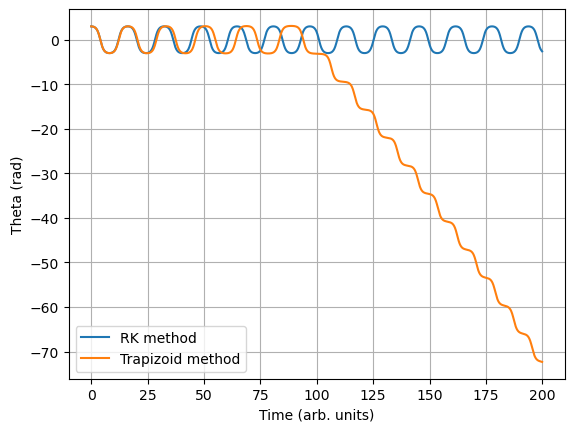

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Simulates a nonlinear pendulum using the fourth order Runge-Kutta algorithm.
# Determines theta and angular velocity of a nonlinear pendulum.

# Parameters for the pendulum problem
k = 0.0
fi = 0.66667
A = 0.0
g = 1
L = 1

# function that carries all ingredients of our nonlinear pendulum model
# is used for both the RK and trapizoid methods
def f(theta, omega, t):
    '''This is for the linear pendulum case. But we also have already set other interesting ingredients for our model'''
    force = (-g/L) * math.sin(theta) - k * omega + A*math.cos(fi*t)  # damping and driven force
    return force

# setting initial conditions (theta and omega) for RK method
theta = 3.0
omega = 0.0

# setting initial conditions (theta and omega) for trapizoid method
theta_trap = 3.0
omega_trap = 0.0

# setting general initial conditions
t = 0.0
dt = 0.1
npoints = 2000

# lists that will store the evolution of theta in time for both RK and trapizoid methods. 
# They already contain t=0 information.
list_theta = [theta]
list_theta_trap = [theta_trap]
list_time = [t]

for nstep in range(1,npoints):
    # code for 4th order RK method
    k1a = dt * omega
    k1b = dt * f(theta, omega, t)
    k2a = dt * (omega + k1b/2)
    k2b = dt * f(theta + k1a/2, omega + k1b/2, t + dt/2)
    k3a = dt * (omega + k2b/2)
    k3b = dt * f(theta + k2a/2, omega + k2b/2, t + dt/2)
    k4a = dt * (omega + k3b)
    k4b = dt * f(theta + k3a, omega + k3b, t + dt)
    
    theta = theta + (k1a + 2 * k2a + 2 * k3a + k4a) / 6
    omega = omega + (k1b + 2 * k2b + 2 * k3b + k4b) / 6
    
    # code for trapizoid method
    k1a_trap = omega_trap * dt
    k1b_trap = f(theta_trap, omega_trap, t) * dt
    k2a_trap = (omega_trap + k1b_trap) * dt
    k2b_trap = f(theta_trap + k1a_trap, omega_trap + k1b_trap, t + dt) * dt

    theta_trap += (k1a_trap + k2a_trap) / 2
    omega_trap += (k1b_trap + k2b_trap) / 2
    
    # updating time increment
    t = t + dt
    
    # appending values of theta from both methods to the appropriate lists
    list_theta.append(theta)
    list_theta_trap.append(theta_trap)
    list_time.append(t)
    
# plotting instructions
plt.plot(list_time, list_theta, label='RK method')
plt.plot(list_time, list_theta_trap, label='Trapizoid method')
plt.xlabel('Time (arb. units)')
plt.ylabel('Theta (rad)')
plt.legend()
plt.grid(True)
plt.savefig('Section7_ThetaVsTime_ForTrapizoidAndRKMethods.png')
plt.show()